# 3S Exomiser performance evaluation

This notebook plots comparison of Exomiser performance with or without 3S module. The performance is evaluated on ~500 cases.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from curation import group_pathomechanism_for_threes_evaluation, load_data, plot_multicolor

sns.set_style('whitegrid')

data_dir = "/Users/danisd/data/threes-simulations"
#data_dir = "/home/ielis/data/threes-simulations"

There were multiple rows of evaluation:
- [First](#20190711)
- [Second](#20190812)

## 20190711

## Read simulations output

Read the `ranks.tsv` file.

### Melt the rows with multiple `PATHOMECHANISM` entries
Some lines represent cases where variants with multiple pathomechanisms were present. 

E.g.: `PMID:24704046-Mattioli-2014-FANCA-proband_II-1	1	1	splicing|3ss|disrupted;splicing|SRE`

We split such line into two lines where value from `PATHOMECHANISM` column is distributed into two rows. Other values stay the same.

### Remove lines representing non-splicing pathomechanisms

Lines with pathomechanism such as `coding|missense` are removed.

In [2]:
version = "20190711"
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190711 = load_data(FPATH)

ho = np.sort(df20190711['PATHOGRP'].unique())
df20190711.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:11828341-Ishii-2002-GLA-proband_1,-1,-1,splicing|SRE|ESS|binding|decreased,SRE
1,PMID:28679633-Ito-2017-MYBPC3-VARIANT407-5C>T,90,10,splicing|3ss|disrupted,3ss|disrupted
2,PMID:23606313-Fan-2013-TAZ-proband,1,1,splicing|5css|activated,5css|activated
3,PMID:8878424-Jin-1996-ITGB3-RS,1,1,splicing|5ss|disrupted,5ss|disrupted
4,PMID:10330348-Teraoka-1999-ATM-AT51LA,1,1,splicing|5ss|disrupted,5ss|disrupted


## Which pathomechanisms are being discovered?

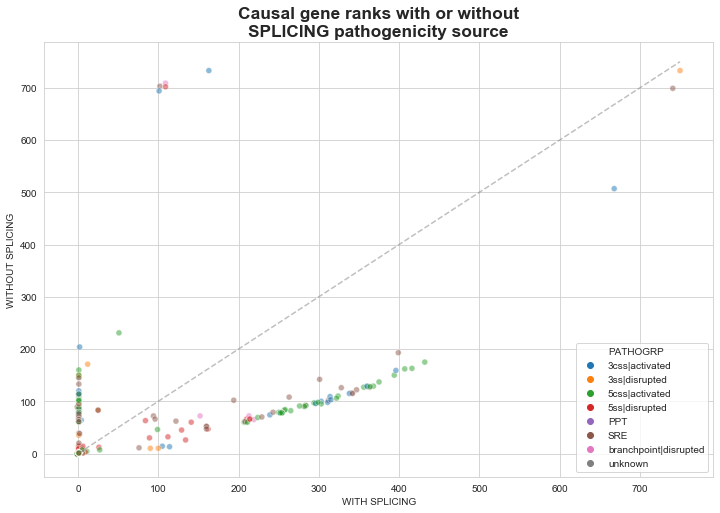

In [3]:
plot_multicolor(df20190711.WITH_SPLICING, df20190711.WITHOUT_SPLICING, df20190711.PATHOGRP, ho)

## Cases where Exomiser performed better _without_ SPLICING score

In [4]:
where_to_save = "{0}/{1}-output-checked/{1}-to_improve.tsv".format(data_dir, version)
df20190711.loc[(df20190711.WITH_SPLICING > 50) & (df20190711.WITH_SPLICING < 200), :].to_csv(where_to_save, sep="\t")

## 20190812

The second round of evaluation on adjusted phenopackets.

In [5]:
version = "20190812"
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190812 = load_data(FPATH)

ho = np.sort(df20190812['PATHOGRP'].unique())
df20190812.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:23239986-Wappenschmidt-2012-BRCA-09_3943-001,-1,-1,splicing|5ss|disrupted,5ss|disrupted
1,PMID:24342716-Kirwin-2014-TAZ-4,1,1,splicing|5ss|disrupted,5ss|disrupted
2,PMID:28507310-Pousada-2017-BMPR2-VARIANT412C>G,1,1,splicing|5css|activated,5css|activated
3,PMID:28679633-Ito-2017-LMNA-VARIANT1146C>T,1,79,splicing|5css|activated,5css|activated
4,PMID:18511318-Fukao-2008-ACAT1-GK43,27,7,splicing|5css|activated,5css|activated


## Which pathomechanisms are being discovered?

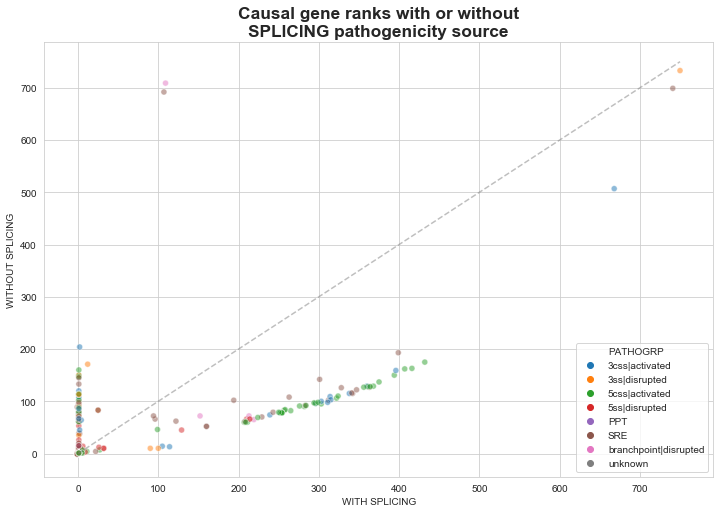

In [6]:
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho)

## Cases where Exomiser performed better _without_ SPLICING score

In [7]:
where_to_save = "{0}/{1}-output-checked/{1}-to_improve.tsv".format(data_dir, version)
df20190812.loc[(df20190812.WITH_SPLICING > 200) & (df20190812.WITH_SPLICING < 400), :].to_csv(where_to_save, sep="\t")

## Comparison of 20190711 and 20190812


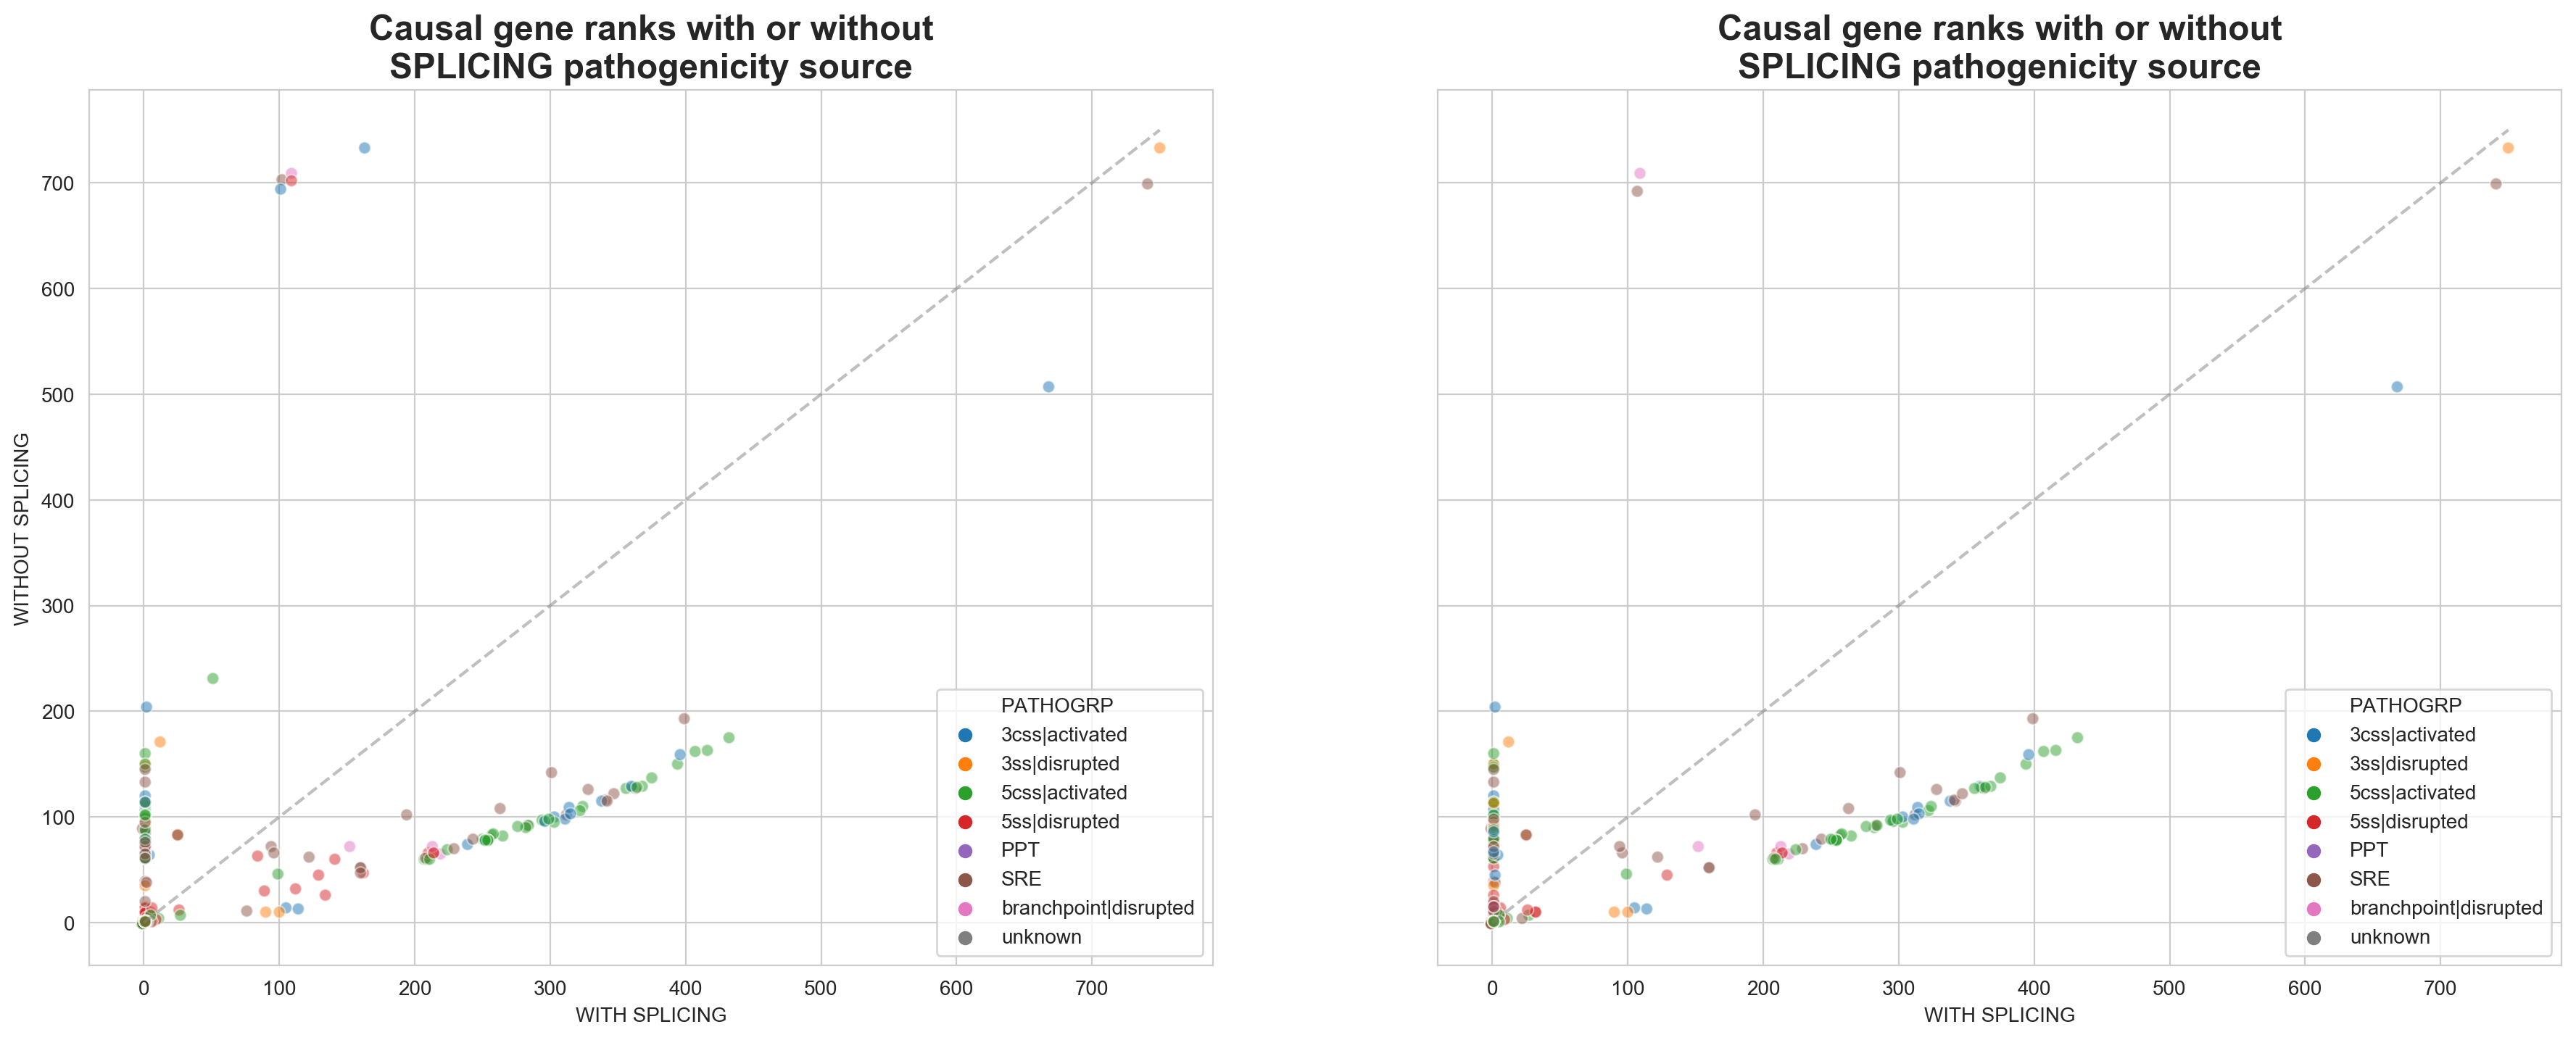

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8), dpi=200, sharey=True)
plot_multicolor(df20190711.WITH_SPLICING, df20190711.WITHOUT_SPLICING, df20190711.PATHOGRP, ho, ax=ax[0])
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax[1])

**Interpretation**

There are more cases under the line and between `50 <--> 200` on *WITH SPLICING* axis on the left plot. Adding the 2nd variant in COMPHET cases, and addidtional HP terms in other cases obviously helped.